# **Building NN using tensorflow**

* build model arch
* compile mode - passing info such as error function , optimizer
* evaluate the model
* make a prediction

In [7]:
import numpy as np 
from random import random 
## to split dataset for test and train 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model



In [15]:
'''
dataset : inputs- array([[0.1, 0.2], [0.2, 0.2]])
              outputs - array(([0.3], [0.4]))
'''
### define a dataset
def generater_dataset(num_samples, test_size):
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0] + i[1]] for i in  x])

    ### after training we have to evaluate our model on datas that model have never seen - to know the performance of model
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
    return x_train, x_test, y_train, y_test


In [16]:
if __name__ == "__main__":
    x_train, x_test, y_train, y_test = generater_dataset(5000, 0.3)
#     print("x_test : \n {}".format(x_test))
#     print("y_test : \n {}".format(y_test))

In [17]:
### build model
### sequential model : 2 neuron input layer --> 5 perceptron in hidden layer ---> 1 output

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation='sigmoid'),    ## hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  ## output layer
])

## Dense_layer : fully connected - all the neurons in the layer  
## Dense(number_of_neurnos , input_layer, activation_function)

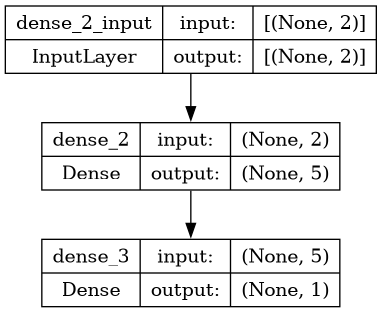

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
### compile model

optimiser = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer = optimiser, loss="MSE")


In [23]:
## train model

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 0.0496
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0434
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 11/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 12/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 13/100


In [24]:
## evaluate the model

print("Model Evaluation")
model.evaluate(x_test, y_test, verbose=1)

Model Evaluation
47/47 [==============================] - 0s 1ms/step - loss: 7.5299e-04


0.0007529864087700844

In [26]:
## make predictions
data = np.array([[0.1, 0.2], [0.2, 0.2]])

perdictions = model.predict(data)

print("Some predictions: ")
for d , p in zip(data, perdictions):
    print("{} + {} = {}".format(d[0], d[1],p[0]))

1/1 [==============================] - 0s 22ms/step
Some predictions: 
0.1 + 0.2 = 0.3063734173774719
0.2 + 0.2 = 0.39898934960365295
